In [86]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 

In [87]:
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['font.size']=14
plt.rcParams['font.weight']='normal'
plt.style.use('seaborn-whitegrid')

In [53]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [88]:
df=pd.read_excel('Energy.xlsx')

In [89]:
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [90]:
df.tail()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [91]:
df.shape

(35040, 10)

In [92]:
df.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [72]:
df = df.convert_dtypes()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  Float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  Float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  Float64
 3   CO2(tCO2)                             35040 non-null  Float64
 4   Lagging_Current_Power_Factor          35040 non-null  Float64
 5   Leading_Current_Power_Factor          35040 non-null  Float64
 6   NSM                                   35040 non-null  Int64  
 7   WeekStatus                            35040 non-null  string 
 8   Day_of_week                           35040 non-null  string 
 9   Load_Type                             35040 non-null  string 
dtypes: Float64(6), Int64(1), string(3)
memory usage: 2.9 MB


In [83]:
col_names=['WeekStatus','Day_of_week','Load_Type']
for col in col_names:
  print(df[col].value_counts())

0    25056
1     9984
Name: WeekStatus, dtype: int64
1    5088
5    4992
6    4992
4    4992
0    4992
2    4992
3    4992
Name: Day_of_week, dtype: int64
0    18072
2     9696
1     7272
Name: Load_Type, dtype: int64


In [93]:
from sklearn import preprocessing
le_WeekStatus=preprocessing.LabelEncoder()
le_WeekStatus.fit(['Weekday','Weekend'])
df['WeekStatus']=le_WeekStatus.transform(df['WeekStatus'])

In [94]:
from sklearn import preprocessing
le_Day_of_week=preprocessing.LabelEncoder()
le_Day_of_week.fit(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df['Day_of_week']=le_Day_of_week.transform(df['Day_of_week'])

In [95]:
from sklearn import preprocessing
le_Load_Type=preprocessing.LabelEncoder()
le_Load_Type.fit(['Light_Load','Medium_Load','Maximum_Load'])
df['Load_Type']=le_Load_Type.transform(df['Load_Type'])

In [96]:
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

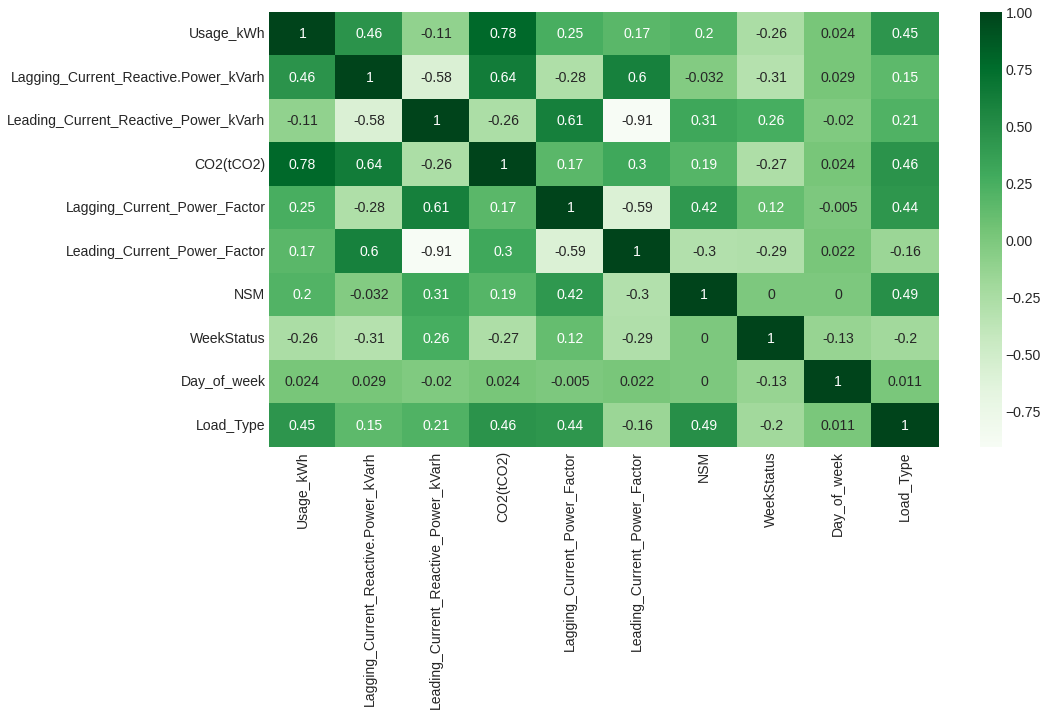

In [97]:
#Get correlation between different variables 
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="Greens")
df.columns

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


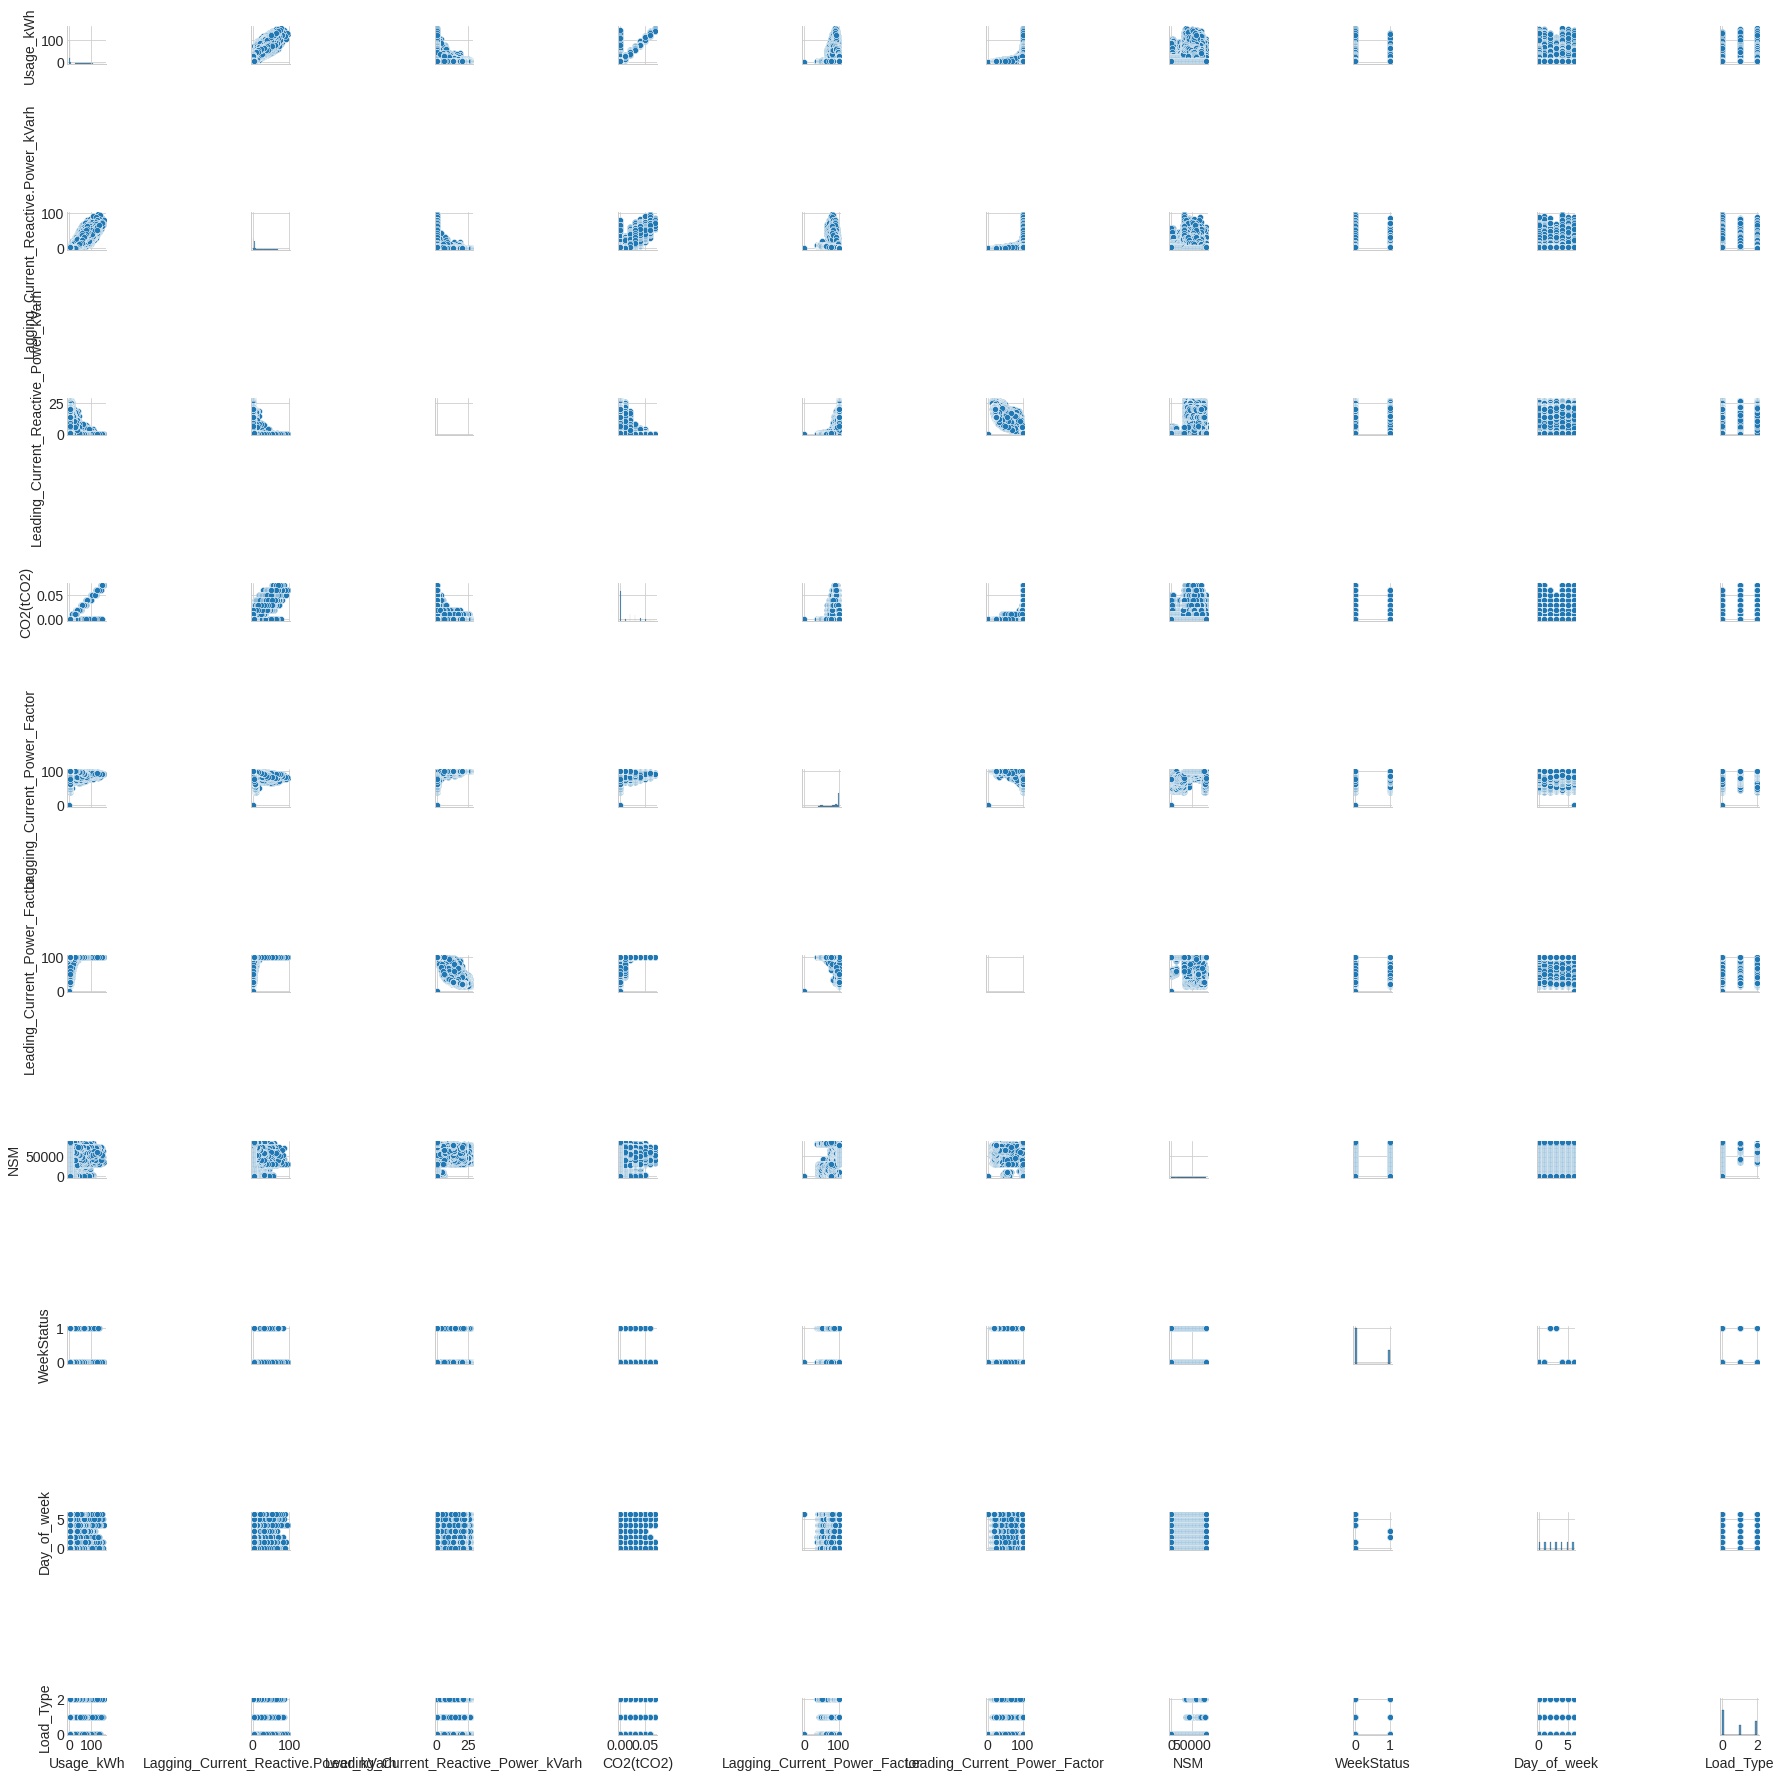

In [98]:
sns.pairplot(df)

In [101]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932,2.994521,0.760959
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,2.000021,0.857523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,1.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000,3.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,5.000000,2.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,6.000000,2.000000


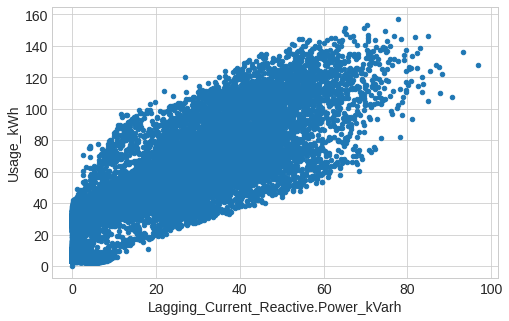

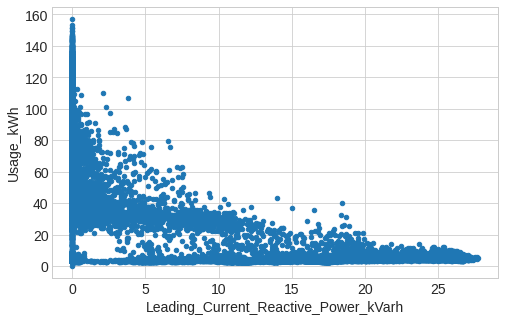

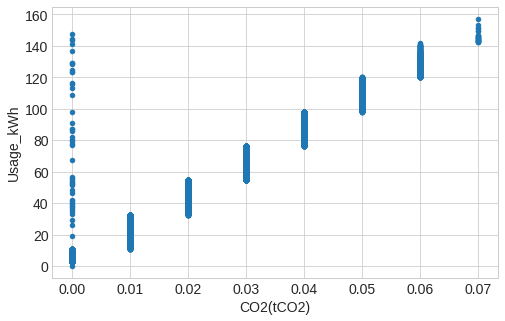

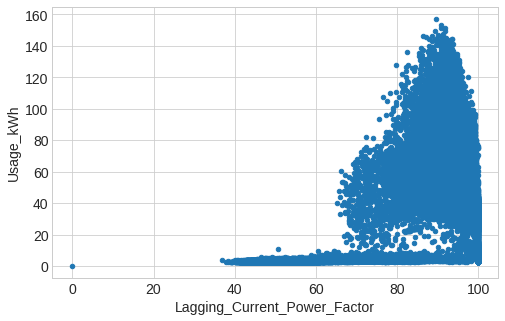

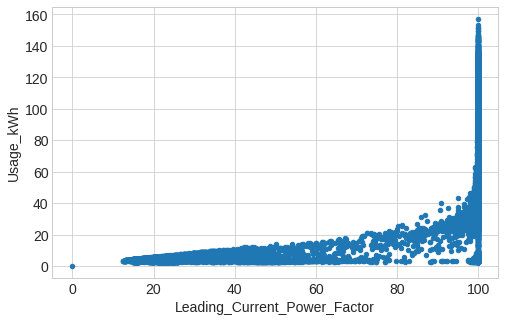

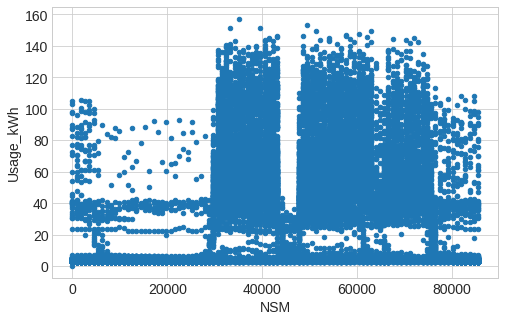

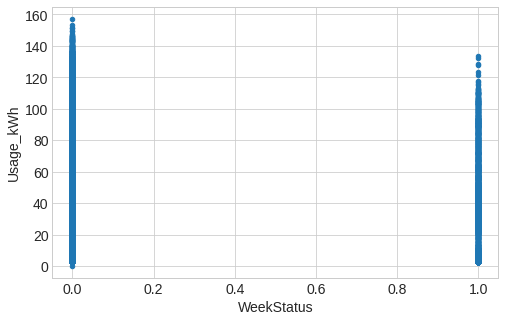

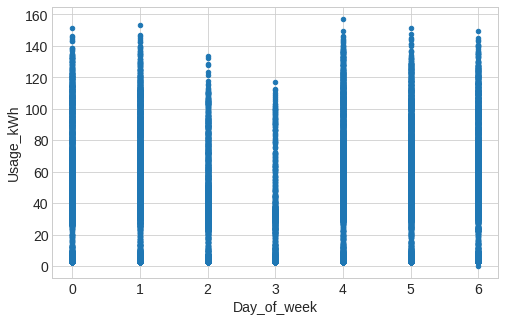

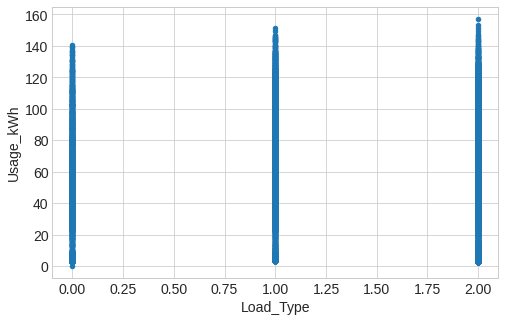

In [102]:
df.plot(kind='scatter', x='Lagging_Current_Reactive.Power_kVarh', y='Usage_kWh')
df.plot(kind='scatter', x='Leading_Current_Reactive_Power_kVarh', y='Usage_kWh')
df.plot(kind='scatter', x='CO2(tCO2)', y='Usage_kWh')
df.plot(kind='scatter', x='Lagging_Current_Power_Factor', y='Usage_kWh')
df.plot(kind='scatter', x='Leading_Current_Power_Factor', y='Usage_kWh')
df.plot(kind='scatter', x='NSM', y='Usage_kWh')
df.plot(kind='scatter', x='WeekStatus', y='Usage_kWh')
df.plot(kind='scatter', x='Day_of_week', y='Usage_kWh')
df.plot(kind='scatter', x='Load_Type', y='Usage_kWh')
plt.show()

Predictor KWH

In [103]:
X=df.drop(columns='Usage_kWh',axis=1)
Y=df['Usage_kWh']

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [105]:
print(X.shape, X_train.shape, X_test.shape)

(35040, 9) (24528, 9) (10512, 9)


In [106]:
regressor=LinearRegression()

In [107]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [108]:
trainingdataprediction=regressor.predict(X_train)

In [109]:
r2=metrics.r2_score(Y_train,trainingdataprediction)
print("R square : ",r2)

R square :  0.9808119901548776


In [110]:
test_predict=regressor.predict(X_test)

In [111]:
r2_test=metrics.r2_score(Y_test,test_predict)
print("R2 value : ",r2_test)

R2 value :  0.9793891436668941


In [112]:
input_data = (3.5,0.0,0.0,73.0,100,900,0,1,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('KWH USAGE IS ', prediction[0])

[4.99582341]
KWH USAGE IS  4.995823407242067


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [113]:
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


In [114]:
x.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,4.5,0.0,0.0,64.72,100.0,4500,0,1,0


input_data = (3.5,0.0,0.0,73.0,100,900,0,1,1)
Lihat dari 9 kolom x

Lagging_Current_Reactive.Power_kVarh	Leading_Current_Reactive_Power_kVarh	CO2(tCO2)	Lagging_Current_Power_Factor	Leading_Current_Power_Factor	NSM	WeekStatus	Day_of_week	Load_Type